# 고급 그래프
    이변수 데이터 분포  pairplot

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
titanic =  sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
titanic_pair = titanic[ ['age','pclass','fare'] ]

In [59]:
titanic_pair.head()

,age,pclass,fare
0,22.0,3,7.2500
1,38.0,1,71.2833
2,26.0,3,7.9250
3,35.0,1,53.1000
4,35.0,3,8.0500


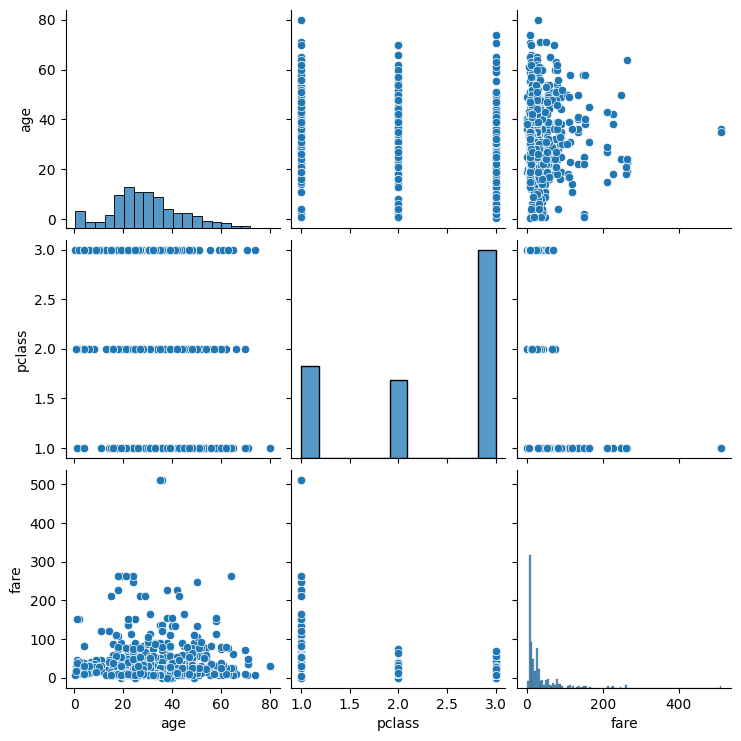

In [60]:
sns.pairplot(titanic_pair)

# Folium

In [9]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 6.1 MB/s eta 0:00:00


In [10]:
import folium

In [23]:
# 서울 지도 만들기 
seoul_map1 = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map2 = folium.Map(location=[37.55,126.98], zoom_start=12, tiles='Stamen Terrain')
seoul_map3 = folium.Map(location=[37.55,126.98], zoom_start=12, tiles='Stamen TONER')
seoul_map1.save('./seoul_map1.html')
seoul_map2.save('./seoul_map2.html')
seoul_map3.save('./seoul_map3.html')

In [62]:
# 대학교 리스트
import pandas as pd
df = pd.read_excel('./서울지역 대학교 위치.xlsx',index_col=0)
df.head(1)
# 위도 경도 / lat, lng

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737


In [51]:

for row in range(len(df)):    
    lat = df.iloc[row,0] # 위도
    lng = df.iloc[row,1] # 경도
    title = df.iloc[row,:].name # 이름
    folium.Marker([lat,lng], tooltip=title ).add_to(seoul_map1)
seoul_map1.save('./seoul_map1.html') 
    

In [53]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat,lng], tooltip=name ).add_to(seoul_map2)
seoul_map2.save('./seoul_map2.html')

# 대학교 위치정보를 circleMarker로 표시

In [66]:
univMap = folium.Map(location=[37.55,126.98], zoom_start=12)
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker(
        [lat,lng], 
        radius=10,
        color = 'brown',
        fill = True,
        fill_color = 'coral',
        fill_opacity = 0.7,
        tooltip=name 
                 ).add_to(univMap)
    
univMap.save('./univMap.html')

### 지도영역에 단계구분도를 표시(Choropleth map)
    행정구역같이 지도상의 경계를 둘러싼 영역에 색을 칠하거나 음영등으로 정보를 나타내는 시각화 방법

In [68]:
import json

In [76]:
# 인구데이터를 가져오기
df =  pd.read_excel('./경기도인구데이터.xlsx',index_col=0)
df.columns = df.columns.map(str)
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [77]:
# 시군구 경계정보 json 파일 불러오기
geo_path = './경기도행정구역경계.json'
geo_data = json.load(open(geo_path,encoding='utf-8'))

In [88]:
# 지도만들기
g_map = folium.Map(location=[37.55,126.98], zoom_start=9
                   # , tiles='Stamen Terrain'
                  )

In [89]:
year = '2017'
folium.Choropleth(geo_data = geo_data,
                  data=df[year],
                  columns=[df.index,df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7,line_opacity=0.3,
                  threshold_scale = [10000,100000,300000,500000,700000],
                  key_on = 'feature.properties.name'
                 ).add_to(g_map)
g_map.save('./gyounggi_map_'+year+'.html')

# 데이터 전처리
    기본전처리(pre-processing)  NaN, outlier  / 결측치, 이상치 처리(제거 또는 대체)
    데이터의 특성에 따라서 : 범주형 데이터로 분리, 연속형 데이터로 분리... 기존 컬럼을 분석해서 새로운 컬럼을 생성
                        : 상관관계와 같은 통계적으로 접근해서 최적의 데이터 셋을 만듦

In [93]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [94]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [98]:
# 누락되 데이터 확인
titanic['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [99]:
# 누락된 데이터 확인  
# isnull()  true->null  결측치
# notnull() true->not null  결측치가 아닐때

In [119]:
# 모든 컬럼의 각 컬럼에 해당하는 결측치 비율
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [109]:
titanic.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [117]:
# 누락 데이터 제거
titanic.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [120]:
# 누락 데이터 제거 NaN값이 500개 이상인 열을 모두 삭제
df_titanic =  titanic.dropna(axis = 1, thresh=500)

In [123]:
# age가 177명정도 데이터가 없다 age컬럼의 데이터가 없는 row는 삭제 한다.
df_age = df_titanic.dropna(subset=['age'], axis=0)
len(df_age)

714

In [127]:
# 데이터 치환  - age의 평균을 구해서 치환
mean_age = df_titanic['age'].mean()

In [134]:
df_titanic['age'].fillna(mean_age, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23084\158380184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['age'].fillna(mean_age, inplace=True)


In [137]:
df_titanic['age'].isnull().sum()

0

In [149]:
(df_titanic.isnull().sum()>0).values

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False])

In [150]:
df_titanic.columns[(df_titanic.isnull().sum()>0).values]

Index(['embarked', 'embark_town'], dtype='object')

In [153]:
# embark_town 승선도시 NaN을 대체
df_titanic[df_titanic['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [154]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [156]:
# 가장많이 승선한 도시이름을 찾아서 대체
most_freq =  df_titanic['embark_town'].value_counts().idxmax()

In [158]:
df_titanic['embark_town'].fillna(most_freq,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23084\4215581849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['embark_town'].fillna(most_freq,inplace=True)


In [160]:
# embarked 는 위에서 동일한 방법으로 처리
most_freq =  df_titanic['embarked'].value_counts().idxmax()
df_titanic['embarked'].fillna(most_freq,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23084\2640434428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['embarked'].fillna(most_freq,inplace=True)


In [161]:
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [162]:
# 데이터를 처리할때.. 
# 1. 양이많을때는 해당 컬럼은 무의미하다. dropna axis =1  해당 컬럼 제거
# 2. 양이적을때는 과감하게 삭제 또는 대체
# 3. 대체 : 이웃하는 데이터끼리 유사성이 많을수 있음 또는 유사성을찾을수 있으면 해당 데이터로 교체
# 4. 수치형 : 평균, 0   범주형은 빈도수가 많은 데이터로 교체

# 중복데이터 처리